**FORMAT CHARTS USING SUBPLOT**
* **Syntax:** fig, ax = plt.subplots(a,b) -> a is the number of rows, b is the number of columns
* **Purpose:** Used to merge multiple plot in 1 figure

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)

Found cached dataset csv (C:/Users/ADMIN/.cache/huggingface/datasets/lukebarousse___csv/lukebarousse--data_jobs-8492436fa5796c3e/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

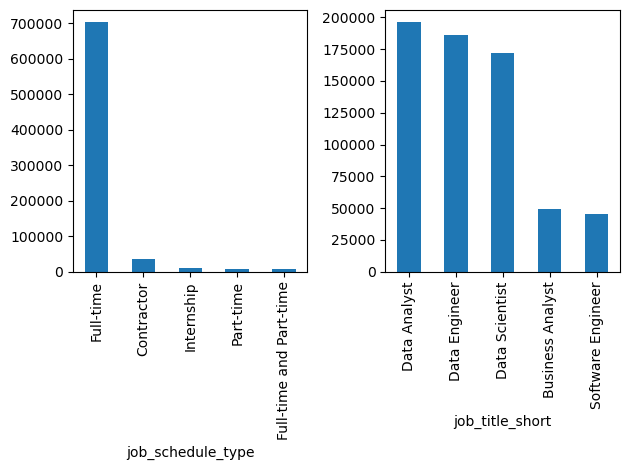

In [2]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().head().plot(kind = 'bar',ax=ax[1])
df['job_schedule_type'].value_counts(ascending = False).head().plot(kind = 'bar',ax=ax[0])
fig.tight_layout()

In [3]:
df1 = df[df['job_title_short'] == "Data Analyst"].copy()
df1['job_skills'] =df1['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)
df1_exploded = df1.explode('job_skills')



In [4]:
# Create a dataframe that contains job skills, job title and count for each skill
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval (x) if pd.notna (x) else x)

In [18]:
df_explode = df.explode('job_skills').copy()
df_exploded = df_explode.groupby(['job_title_short','job_skills']).size()
exploded_one = df_exploded.reset_index(name = 'skill_count')
df_explodee = exploded_one.sort_values(by = 'skill_count',ascending = False)



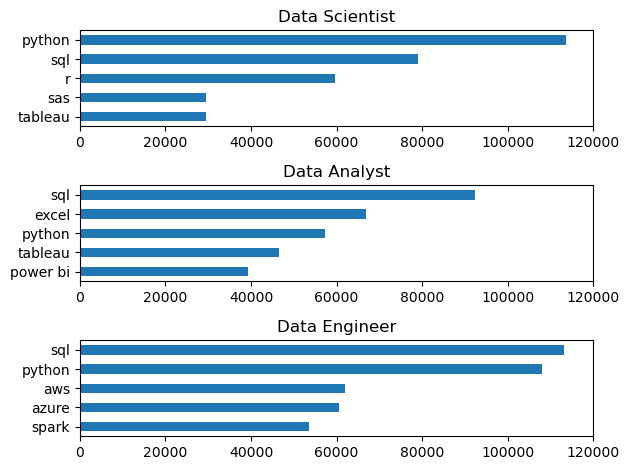

In [36]:
fig, ax=plt.subplots(3,1)

job_title = ['Data Scientist', 'Data Analyst', 'Data Engineer']
for i, job_titles in enumerate(job_title):
    df_plot=df_explodee[df_explodee['job_title_short']==job_titles].head(5)
    df_plot.plot(kind = 'barh', x='job_skills',y='skill_count',ax=ax[i],title=job_titles)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.tight_layout()
    